In [16]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255)
valid_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
    './horse-or-human/',
    target_size=(300,300),
    batch_size=32,
    class_mode="binary")

valid_generator = valid_datagen.flow_from_directory(
    './validation-horse-or-human/',
    target_size=(300,300),
    batch_size=32,
    class_mode="binary")

print("\ntrain images shap:", train_generator.image_shape, "test images shap:",valid_generator.image_shape,"\n")

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.

train images shap: (300, 300, 3) test images shap: (300, 300, 3) 



In [10]:
#训练回调函数
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch,logs={}):
        if(logs.get('loss') < 0.001):
            print("\nLoss is low so cancelling training!")
            self.model.stop_training = True

callbacks = myCallback()



model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(16,(3,3),activation="relu",input_shape=train_generator.image_shape),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(32,(3,3),activation="relu"),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64,(3,3),activation="relu"),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss="binary_crossentropy",optimizer=RMSprop(lr=0.001),metrics=["acc"])
history = model.fit(
    train_generator,
    epochs=15,
    validation_data=valid_generator,
    validation_steps=8,
    callbacks=[callbacks])


Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.

train images shap: (300, 300, 3) test images shap: (300, 300, 3) 

Epoch 1/15
33/33 [==============================] - 47s 1s/step - loss: 0.8838 - acc: 0.8130 - val_loss: 1.2190 - val_acc: 0.6055
Epoch 2/15
33/33 [==============================] - 46s 1s/step - loss: 0.2831 - acc: 0.9367 - val_loss: 1.2506 - val_acc: 0.7969
Epoch 3/15
33/33 [==============================] - 48s 1s/step - loss: 0.0168 - acc: 0.9981 - val_loss: 4.2170 - val_acc: 0.7461
Epoch 4/15
33/33 [==============================] - 48s 1s/step - loss: 0.2399 - acc: 0.9776 - val_loss: 3.1794 - val_acc: 0.7969
Epoch 5/15
33/33 [==============================] - 54s 2s/step - loss: 0.0021 - acc: 1.0000 - val_loss: 3.3283 - val_acc: 0.8359
Epoch 6/15
33/33 [==============================] - ETA: 0s - loss: 3.3654e-04 - acc: 1.0000
Loss is low so cancelling training!
33/33 [==============================] - 54s 2s/step - loss: 3.3654e-0

In [8]:
print("\nmodel evaluate:")
model.evaluate(valid_generator)


model evaluate:
8/8 [==============================] - 2s 248ms/step - loss: 3.9412 - acc: 0.7773


[3.9412052631378174, 0.77734375]

In [45]:
from tensorflow.keras.preprocessing import image

def img_test(path):
    img = image.load_img(path,target_size=(300,300))
    plt.imshow(img)
    img_temp = image.img_to_array(img)
    img_temp = np.expand_dims(img_temp,axis=0)
    images = np.vstack([img_temp])
    predict_results = model.predict(images)
    if abs(1-predict_results) < 0.00001:
        print("predict_results:",predict_results,"// Humans")
    elif abs(0-predict_results) < 0.00001:
        print("predict_results:",predict_results,"// House")
    else:
        print("Too little certainty!")
    

predict_results: [[0.]] // House


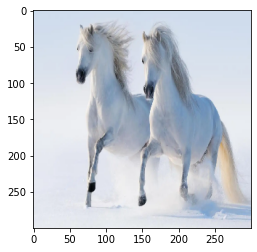

In [64]:
img_test("img-test\\002.png")

<Figure size 432x288 with 0 Axes>

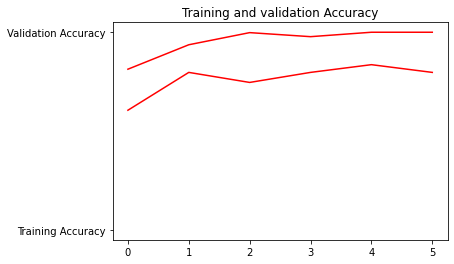

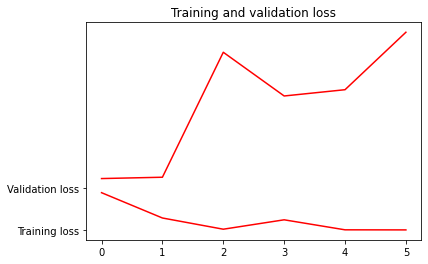

<Figure size 432x288 with 0 Axes>

In [13]:
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(len(acc))

plt.title("Training and validation Accuracy")
plt.plot(epochs,acc,'r',"Training Accuracy")
plt.plot(epochs,val_acc,'r',"Validation Accuracy")

plt.figure()

plt.title("Training and validation loss")
plt.plot(epochs,loss,'r',"Training loss")
plt.plot(epochs,val_loss,'r',"Validation loss")

plt.figure()